In [1]:
import numpy as np
import pandas as pd

In [2]:
gts = np.load('/mnt/sda1/Summarization/SurgSum/result/model_name=pgl_sum-lr=5e-05-loss_fn=mae-mode=fit_test/gts.npy')
out = np.load('/mnt/sda1/Summarization/SurgSum/result/model_name=pgl_sum-lr=5e-05-loss_fn=mae-mode=fit_test/outputs.npy')

In [3]:
df = pd.DataFrame({'gts':gts[0],'out':out[0]})

In [4]:
for i in [0,0.5,1]:
    print(f'{i}: {df[df.gts==i].out.mean()}')

0: 0.14335095882415771
0.5: 0.6871922612190247
1: 0.8478579521179199


In [5]:
df['id'] = df.index // 10

In [6]:
max_id = df.id.max()

In [7]:
df = df.merge(df.groupby('id').aggregate('mean').rename(columns={'out':'out_mean'})['out_mean'], on='id', how='left')

In [8]:
p_rate = 0
n_rate = 0
for i in range(100):
    tmp = df.iloc[::10].sample(50, random_state=i)
    p_rate += len(tmp[tmp.gts==1]) * 0.01 / len(tmp)
    n_rate += len(tmp[tmp.gts==0]) * 0.01 / len(tmp)
print(f'p_rate: {p_rate}')
print(f'n_rate: {n_rate}')
print(len(tmp[tmp.gts==0.5]) / len(tmp))
print(np.var(tmp.id/max_id))

p_rate: 0.25860000000000005
n_rate: 0.3916000000000001
0.36
0.07779265058275935


In [9]:
output = df.sort_values('out_mean',ascending=False).iloc[:-(-(len(df))//10)].iloc[::10]
p_rate = len(output[output.gts==1]) / len(output)
n_rate = len(output[output.gts==0]) / len(output)
print(f'p_rate: {p_rate}')
print(f'n_rate: {n_rate}')
print(len(output[output.gts==0.5]) / len(output))
print(np.var(output.id/max_id))

p_rate: 0.6530612244897959
n_rate: 0.02040816326530612
0.32653061224489793
0.06667413640971791


In [10]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import random

print(f'mae: {mae(df.gts, df.out)}')
print(f'mse: {mse(df.gts, df.out)}')

mae: 0.22499532997608185
mse: 0.11905192583799362


In [11]:
mae_score=0
mse_score=0

for i in range(100):
    random.seed(i)
    mae_score += mae(df.gts, [random.random() for _ in range(len(df))])/100
    mse_score += mse(df.gts, [random.random() for _ in range(len(df))])/100

print(f'mae: {mae_score}')
print(f'mse: {mse_score}')

mae: 0.41608347352122277
mse: 0.248601668320607


In [15]:
len(df)

4896

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/home/aolab/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [68]:
from sklearn.metrics import accuracy_score, f1_score

In [69]:
df_p[df_p.video_idx==3].field.value_counts()

True     3044
False    1852
Name: field, dtype: int64

In [64]:
gts

array([0, 0, 0, ..., 0, 0, 0])

In [82]:
df_p = pd.read_csv('/mnt/sda1/Summarization/SurgSum/result/fps_sampling=1-batch_size=128-img_size=224-out_features=6-lr=0.0001-loss_fn=ib_focal-max_epoch=20-aug_ver=1/processed_df.csv')
th = 0.1
pred = df.out.map(lambda x: 1 if x>th else 0).values
df_p = df_p[df_p.video_idx==3]
df_p['field'] = df_p.field.map(lambda x: 1 if x=='True' else 0)
gts = df_p.field.values
print(f'acc: {accuracy_score(gts, pred)}')
print(f'f1: {f1_score(gts, pred)}')

acc: 0.8705065359477124
f1: 0.8975436328377504


/home/aolab/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
df_p.field=='True'

10210     True
10211     True
10212     True
10213     True
10214     True
         ...  
15101    False
15102    False
15103    False
15104    False
15105    False
Name: field, Length: 4896, dtype: bool

,Frame,time,field,phase,summary,video_idx,file_name,stage,y
10210,0,0:00:00.00,0,others,-1.0,3,video03_000001.png,val,1
10211,30,0:00:01.00,0,others,-1.0,3,video03_000031.png,val,1
10212,60,0:00:02.00,0,others,-1.0,3,video03_000061.png,val,1
10213,90,0:00:03.00,0,others,-1.0,3,video03_000091.png,val,1
10214,120,0:00:04.00,0,others,-1.0,3,video03_000121.png,val,1
...,...,...,...,...,...,...,...,...,...
15101,146730,1:21:31.00,0,irrelevant,-1.0,3,video03_146731.png,val,1
15102,146760,1:21:32.00,0,irrelevant,-1.0,3,video03_146761.png,val,1
15103,146790,1:21:33.00,0,irrelevant,-1.0,3,video03_146791.png,val,1
15104,146820,1:21:34.00,0,irrelevant,-1.0,3,video03_146821.png,val,1


In [42]:
pred.sum()

4

In [43]:
gts.sum()

0

# segbar

In [308]:
import matplotlib.pyplot as plt
%matplotlib inline

def segment_bars_with_confidence(save_path, confidence, *labels):
    num_pics = len(labels) + 1
    color_map = plt.get_cmap('gist_rainbow')
 
    axprops = dict(xticks=[], yticks=[], frameon=False)
    barprops = dict(aspect='auto', cmap=color_map,
                    interpolation='nearest', vmin=0)
    fig = plt.figure(figsize=(15, num_pics * 1.5))
 
    interval = 1 / (num_pics+1)
    for i, label in enumerate(labels):
        i = i + 1
        ax1 = fig.add_axes([0, 1-i*interval, 1, interval])
        ax1.imshow([label], **barprops)
 
    ax4 = fig.add_axes([0, interval, 1, interval])
    ax4.set_xlim(0, len(confidence))
    ax4.set_ylim(0, 1)
    ax4.plot(range(len(confidence)), confidence)
    ax4.plot(range(len(confidence)), [0.3] * len(confidence), color='red', label='0.5')
 
    if save_path is not None:
        plt.savefig(save_path)
    else:
        plt.show()

def segment_bars(color, save_path, *labels):
    num_pics = len(labels)
    color_map = plt.get_cmap(color) #https://beiznotes.org/matplot-cmap-list/
    # color_map =
    fig = plt.figure(figsize=(15, num_pics * 1.5))
 
    barprops = dict(aspect='auto', cmap=color_map,
                    interpolation='nearest', vmin=0, vmax=20)
 
    for i, label in enumerate(labels):
        plt.subplot(num_pics, 1,  i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow([label], **barprops)
 
    if save_path is not None:
        plt.savefig(save_path)
    else:
        plt.show()
 
    plt.close()

In [309]:
df.gts.value_counts()

0.0    1968
0.5    1660
1.0    1268
Name: gts, dtype: int64

In [310]:
len(df)//10

489

In [311]:
th = df.sort_values('out_mean',ascending=False).iloc[len(df)//10].out_mean

In [312]:
df['summary'] = df.out_mean.map(lambda x: 1 if x >= th else 0)

In [313]:
def get_gts(x):
    if x == 0:
        return 0
    elif x == 0.5:
        return 10
    else:
        return 20


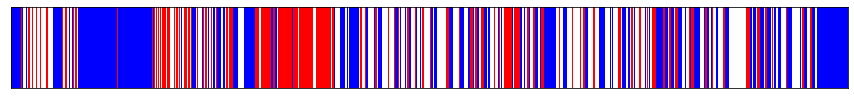

In [314]:
segment_bars('bwr', None, df.gts.map(lambda x: get_gts(x)).values)

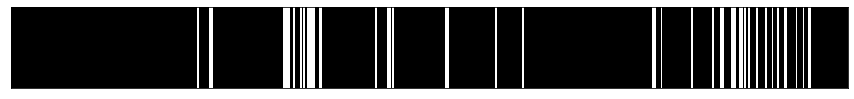

In [315]:
segment_bars('binary', None, 256 - df.summary.values*256)

In [316]:
phase_df = pd.read_csv('/mnt/sda1/Summarization/SurgSum/result/fps_sampling=1-batch_size=128-img_size=224-out_features=6-lr=0.0001-loss_fn=ib_focal-max_epoch=20-aug_ver=1/processed_df.csv')
phase_df = phase_df[phase_df.video_idx==3].reset_index()
tmp = pd.concat([df, phase_df['phase']], axis=1)

/home/aolab/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [317]:
dic = {
    'design': 0,
    'anesthesia': 1,
    'incision': 2,
    'dissection': 3,
    'hemostasis': 4,
    'closure': 5,
    'others': 6,
}

In [318]:
tmp['phase'] = tmp.phase.replace('irrelevant', np.nan).ffill().bfill()
tmp['phase'] = tmp.phase.map(lambda x: dic[x]) 

In [319]:
tmp.phase.value_counts()

5    2162
3     862
6     721
2     687
0     421
4      43
Name: phase, dtype: int64

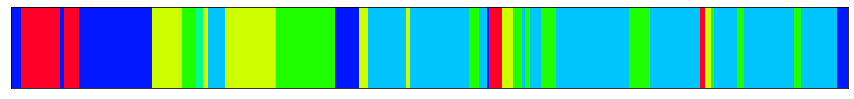

In [320]:
segment_bars('gist_rainbow', None, tmp.phase.values*2.5)

In [327]:
sorted(

[0, 1, 2, 3, 4, 5, 6]

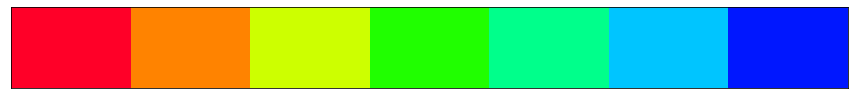

In [328]:
segment_bars('gist_rainbow', None, np.array([i for i in range(7)])*2.5)

In [259]:
def get_labels(self):
    class_labels = {}
    for i,label in enumerate(self.df.phase.unique()):
        class_labels[label] = i
        if self.stage == "train":
            logger.info(f"{label}: {i}")
    return class_labels

,gts,out,id,out_mean,summary,phase
0,0.0,0.272770,0,0.135408,0,others
1,0.0,0.110902,0,0.135408,0,others
2,0.0,0.102851,0,0.135408,0,others
3,0.0,0.534489,0,0.135408,0,others
4,0.0,0.145323,0,0.135408,0,others
...,...,...,...,...,...,...
4891,0.0,0.009866,489,0.007680,0,irrelevant
4892,0.0,0.008232,489,0.007680,0,irrelevant
4893,0.0,0.008673,489,0.007680,0,irrelevant
4894,0.0,0.006035,489,0.007680,0,irrelevant


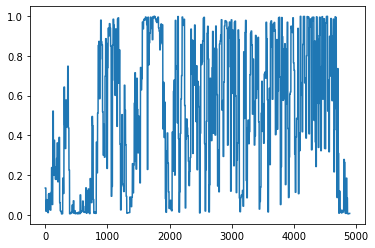

In [109]:
plt.plot(range(len(df.out)), df.out_mean)
